# *載入所需要套件*
BatchNormalization實作


In [0]:
import numpy as np
import pandas as pd
from keras.utils import np_utils
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers.normalization import BatchNormalization
np.random.seed(10)

載入mnist資料集

In [0]:
from keras.datasets import mnist

讀取資料集

In [0]:
(x_train_image,y_train_label),\
(x_test_image,y_test_label) = mnist.load_data()

將特徵做Reshape轉換

In [0]:
x_Train = x_train_image.reshape(60000,784).astype('float32')
x_Test = x_test_image.reshape(10000,784).astype('float32')

將特徵標準化

In [0]:
x_Train_normalize = x_Train/255
x_Test_normalize = x_Test/255

將數字以oneHotEncoding轉換

In [0]:
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_test_label = np_utils.to_categorical(y_test_label)

建立Sequential()模型

In [0]:
model = Sequential()

建立輸入層隱藏層

In [0]:
model.add(Dense(units = 256,
                input_dim = 784,
                kernel_initializer = 'normal',
                activation = 'relu'))

BatchNormalization

In [0]:
model.add(BatchNormalization())

建立輸出層

In [0]:
model.add(Dense(units = 10,
                kernel_initializer = 'normal',
                activation = 'softmax'))

# 進行訓練

In [0]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'sgd',metrics = ['accuracy'])

執行訓練程式

In [17]:
train_history = model.fit(x= x_Train_normalize,
                          y=y_Train_OneHot,validation_split = 0.2,
                          epochs = 10,batch_size = 200,verbose = 2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 2s - loss: 0.7904 - accuracy: 0.7798 - val_loss: 0.6688 - val_accuracy: 0.8777
Epoch 2/10
 - 2s - loss: 0.4020 - accuracy: 0.8915 - val_loss: 0.3520 - val_accuracy: 0.9087
Epoch 3/10
 - 2s - loss: 0.3271 - accuracy: 0.9104 - val_loss: 0.2892 - val_accuracy: 0.9219
Epoch 4/10
 - 2s - loss: 0.2865 - accuracy: 0.9206 - val_loss: 0.2584 - val_accuracy: 0.9311
Epoch 5/10
 - 2s - loss: 0.2580 - accuracy: 0.9287 - val_loss: 0.2367 - val_accuracy: 0.9367
Epoch 6/10
 - 2s - loss: 0.2372 - accuracy: 0.9341 - val_loss: 0.2198 - val_accuracy: 0.9410
Epoch 7/10
 - 2s - loss: 0.2196 - accuracy: 0.9393 - val_loss: 0.2061 - val_accuracy: 0.9441
Epoch 8/10
 - 2s - loss: 0.2039 - accuracy: 0.9435 - val_loss: 0.1945 - val_accuracy: 0.9472
Epoch 9/10
 - 2s - loss: 0.1922 - accuracy: 0.9470 - val_loss: 0.1854 - val_accuracy: 0.9495
Epoch 10/10
 - 2s - loss: 0.1806 - accuracy: 0.9498 - val_loss: 0.1766 - val_accuracy: 0.9516


建立繪圖函示

In [0]:
def show_train_history(train_history, train, validation):

    plt.plot(train_history.history[train])

    plt.plot(train_history.history[validation])

    plt.title('Train History')

    plt.ylabel(train)

    plt.xlabel('Epoch')

    plt.legend(['train', 'validation'], loc='center right')

    plt.show()

顯示訓練成果

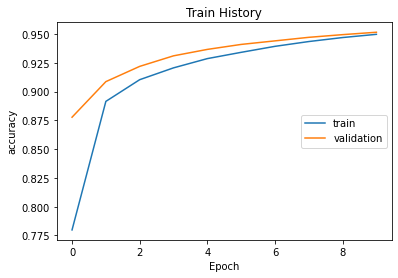

In [19]:
show_train_history(train_history,'accuracy','val_accuracy')

顯示訓練損失

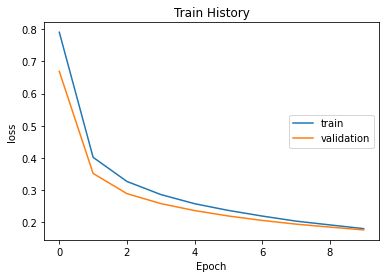

In [20]:
show_train_history(train_history,'loss','val_loss')